<a href="https://colab.research.google.com/github/DipalokSen/Fake-News-Prediction-System-/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this project we will train our model to detect fake **news**

Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data = pd.read_csv('/content/train.csv', encoding='latin-1')

In [ ]:
data.shape

(20800, 5)

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Counting the number of null values

In [ ]:
data.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
data=data.fillna('')

In [ ]:
data.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [ ]:
data['content']=data['author']+' '+data['title']

### Lets see the Data

In [30]:
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...


### Spliting the data and separating the label

In [ ]:
x=data.drop(columns='label',axis=1)
y=data['label']

In [ ]:
print(x)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didnât Even See Comeyâs...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a âPoster Child For White...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macyâs Is Said to Receive Takeover Approach ...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

### Now We will do the steming

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [ ]:
data['content']=data['content'].apply(stemming)

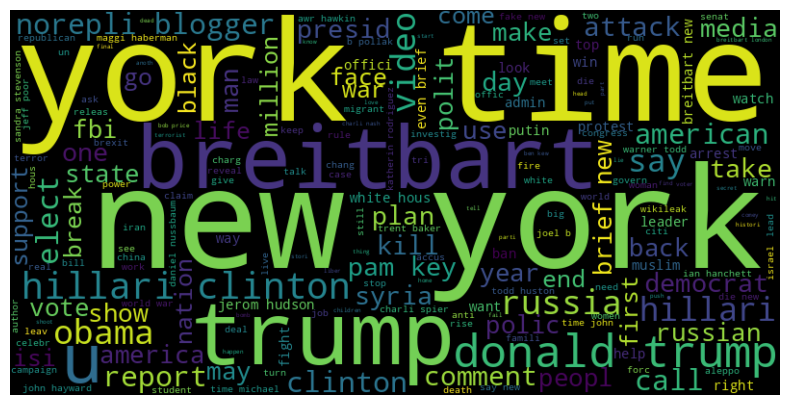

In [32]:
from wordcloud import wordcloud,WordCloud
import matplotlib.pyplot as plt

text_data = " ".join(data['content'])


stop_words = set(stopwords.words("english"))
filtered_words = " ".join([word for word in text_data.split() if word.lower() not in stop_words])


wordcloud = WordCloud(width=800, height=400,colormap="viridis").generate(filtered_words)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
X=data['content'].values
Y=data['label'].values

In [ ]:
print(x)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didnât Even See Comeyâs...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a âPoster Child For White...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macyâs Is Said to Receive Takeover Approach ...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

### Transforming Textual data into numeric data

In [ ]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)

In [ ]:
print(X)

  (0, 268)	0.2701012497770876
  (0, 2485)	0.36765196867972083
  (0, 2962)	0.24684501285337127
  (0, 3603)	0.3598939188262558
  (0, 3795)	0.27053324808454915
  (0, 4979)	0.23331696690935097
  (0, 7012)	0.2187416908935914
  (0, 7698)	0.24785219520671598
  (0, 8636)	0.2921251408704368
  (0, 8915)	0.36359638063260746
  (0, 13480)	0.2565896679337956
  (0, 15697)	0.2848506356272864
  (1, 1498)	0.2939891562094648
  (1, 1895)	0.15521974226349364
  (1, 2224)	0.3827320386859759
  (1, 2816)	0.19094574062359204
  (1, 3571)	0.26373768806048464
  (1, 5510)	0.7143299355715573
  (1, 6823)	0.1904660198296849
  (1, 16812)	0.30071745655510157
  (2, 2946)	0.3179886800654691
  (2, 3106)	0.46097489583229645
  (2, 5396)	0.3866530551182615
  (2, 5975)	0.3474613386728292
  (2, 9625)	0.49351492943649944
  :	:
  (20797, 3646)	0.2115550061362374
  (20797, 7049)	0.21799048897828685
  (20797, 8370)	0.22322585870464115
  (20797, 8994)	0.36160868928090795
  (20797, 9523)	0.29542040034203126
  (20797, 9593)	0.17455348

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

Now Traing the model

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

Accuracy Test

In [ ]:
model_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(model_prediction,y_train)

In [ ]:
print(f"Accuracy of the model is {training_data_accuracy}")

Accuracy of the model is 0.9864783653846154


Train Data Accuracy

In [ ]:
model_prediction_test=model.predict(x_test)
testing_data_accuracy=accuracy_score(model_prediction_test,y_test)

In [ ]:
print(f"Accuracy of the model is {testing_data_accuracy}")

Accuracy of the model is 0.979326923076923
